In [8]:
%pylab inline
%load_ext autoreload
%autoreload 2

import os, glob
import cPickle as pickle

import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1" 
import sklearn.metrics

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/n/home05/haehn/.conda/envs/CP/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'boxplot']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
EXPERIMENT = 'Figure1_Position_Common_Scale'
RESULTS_DIR = '/n/regal/pfister_lab/PERCEPTION/RESULTS_NEW/' + EXPERIMENT
print RESULTS_DIR

/n/regal/pfister_lab/PERCEPTION/RESULTS_NEW/Figure1_Position_Common_Scale


In [3]:
stats['y_pred'][1], stats['y_test'][1]

NameError: name 'stats' is not defined

In [280]:
np.log(np.abs(5.03747940e-02) + .125) / np.log(2)

-2.5114866856700027

In [296]:
(stats['y_test']*80.).min()

20.0

In [298]:
(stats['y_pred']*80.).max()

83.9188

In [300]:
stats['y_pred'].max()

1.048985

In [287]:
np.log2(sklearn.metrics.mean_absolute_error(stats['y_test'], stats['y_pred']) + .125)

-2.7394979978642597

In [272]:
stats['y_pred'] - stats['y_test']

array([[  3.74794006e-04,   5.03747940e-02,  -5.74625206e-01, ...,
          2.53747940e-02,  -3.37125206e-01,  -8.71252060e-02],
       [ -7.10564852e-03,   4.28943515e-02,  -5.82105649e-01, ...,
          1.78943515e-02,  -3.44605649e-01,  -9.46056485e-02],
       [  5.82962096e-01,   6.32962096e-01,   7.96209574e-03, ...,
          6.07962096e-01,   2.45462096e-01,   4.95462096e-01],
       ..., 
       [ -5.49322367e-03,   4.45067763e-02,  -5.80493224e-01, ...,
          1.95067763e-02,  -3.42993224e-01,  -9.29932237e-02],
       [  3.63235712e-01,   4.13235712e-01,  -2.11764288e-01, ...,
          3.88235712e-01,   2.57357121e-02,   2.75735712e-01],
       [  8.53441656e-02,   1.35344166e-01,  -4.89655834e-01, ...,
          1.10344166e-01,  -2.52155834e-01,  -2.15583444e-03]])

In [335]:
np.mean(np.log2(np.abs(stats['y_pred'].ravel() - stats['y_test'].ravel())+.125))

-2.7526743728327348

In [336]:
np.mean(np.log2(np.abs(stats['y_pred'].ravel()*100 - stats['y_test'].ravel()*100)+.125))

0.85739299747777054

In [337]:
np.log2(sklearn.metrics.mean_absolute_error(stats['y_pred']*100, stats['y_test']*100) + .125)

1.3777863177845102

In [338]:
np.log2(sklearn.metrics.mean_absolute_error(stats['y_pred'], stats['y_test']) + .125)

-2.7394979978642597

In [339]:
np.log2(np.mean(np.abs(stats['y_pred'].ravel()*100 - stats['y_test'].ravel()*100)+.125))

1.3777863177845102

In [340]:
np.log2(np.mean(np.abs(stats['y_pred'].ravel()*100 - stats['y_test'].ravel()*100))+.125)

1.3777863177845102

In [6]:
np.log2(np.mean(np.abs(stats['y_pred'].ravel() - stats['y_test'].ravel()))+.125)

-2.7394979978642597

In [11]:
np.log2(sklearn.metrics.mean_absolute_error(stats['y_pred']*100, stats['y_test']*100) + .125)

1.3777863177845102

In [304]:
np.round(np.abs(stats['y_pred']*100 - stats['y_test']*100),2).shape

(9986, 9986)

In [313]:
stats['y_pred'].ravel() - stats['y_test'].ravel()

array([ 0.00037479,  0.04289435,  0.0079621 , ...,  0.01950678,
        0.02573571, -0.00215583])

In [314]:
stats['y_pred'] - stats['y_test']

array([[  3.74794006e-04,   5.03747940e-02,  -5.74625206e-01, ...,
          2.53747940e-02,  -3.37125206e-01,  -8.71252060e-02],
       [ -7.10564852e-03,   4.28943515e-02,  -5.82105649e-01, ...,
          1.78943515e-02,  -3.44605649e-01,  -9.46056485e-02],
       [  5.82962096e-01,   6.32962096e-01,   7.96209574e-03, ...,
          6.07962096e-01,   2.45462096e-01,   4.95462096e-01],
       ..., 
       [ -5.49322367e-03,   4.45067763e-02,  -5.80493224e-01, ...,
          1.95067763e-02,  -3.42993224e-01,  -9.29932237e-02],
       [  3.63235712e-01,   4.13235712e-01,  -2.11764288e-01, ...,
          3.88235712e-01,   2.57357121e-02,   2.75735712e-01],
       [  8.53441656e-02,   1.35344166e-01,  -4.89655834e-01, ...,
          1.10344166e-01,  -2.52155834e-01,  -2.15583444e-03]])

In [327]:
stats['y_test'].dtype

dtype('float64')

In [268]:
sklearn.metrics.mean_squared_log_error(stats['y_test'], stats['y_pred'])

0.00040134466390674245

In [19]:
datasets = sorted(os.listdir(RESULTS_DIR))

results_per_dataset = [None]*len(datasets)

for d in datasets:

    classifiers = ['RF', 'RF_Image', 'MLP', 'LeNet', 'VGG19', 'Xception']

    msle = {}

    for c in classifiers:

        files = glob.glob(RESULTS_DIR + '/'+d+'/'+c+'/*_results.p')
        print 'Found', len(files), 'files for', c, 'on dataset', d

        mean_squared_log_errors = [0] * len(files)

        for file in files:

            index = int(file.split('_results')[0].split('_')[-1])
    #         print 'Loading file', index

            with open(file, 'r') as f:
                stats = pickle.load(f)

#             log_error = sklearn.metrics.mean_squared_log_error(stats['y_test'], stats['y_pred'])
#             log_error = np.mean(np.log2(np.abs(stats['y_pred'].ravel()*100 - stats['y_test'].ravel()*100)+.125))
#             log_error = np.log2(sklearn.metrics.mean_absolute_error(stats['y_pred'], stats['y_test']) + .125)
            log_error = np.log2(sklearn.metrics.mean_absolute_error(stats['y_pred']*100, stats['y_test']*100) + .125)
            mean_squared_log_errors[index] = log_error

        msle[c] = mean_squared_log_errors

    # order by classifier complexity
    labels = ['RandomForest', 'RandomForest Image', 'MLP', 'LeNet + MLP', 'VGG19 + MLP', 'Xception + MLP']
    values = [msle['RF'], msle['RF_Image'], msle['MLP'], msle['LeNet'], msle['VGG19'], msle['Xception']]

    results_per_dataset[int(d)-1] = (labels, values)
    

Found 40 files for RF on dataset 1
Found 40 files for RF_Image on dataset 1
Found 40 files for MLP on dataset 1
Found 40 files for LeNet on dataset 1
Found 40 files for VGG19 on dataset 1
Found 40 files for Xception on dataset 1
Found 40 files for RF on dataset 2
Found 40 files for RF_Image on dataset 2
Found 40 files for MLP on dataset 2
Found 40 files for LeNet on dataset 2
Found 40 files for VGG19 on dataset 2
Found 40 files for Xception on dataset 2
Found 40 files for RF on dataset 3
Found 10 files for RF_Image on dataset 3
Found 40 files for MLP on dataset 3
Found 40 files for LeNet on dataset 3
Found 40 files for VGG19 on dataset 3
Found 40 files for Xception on dataset 3


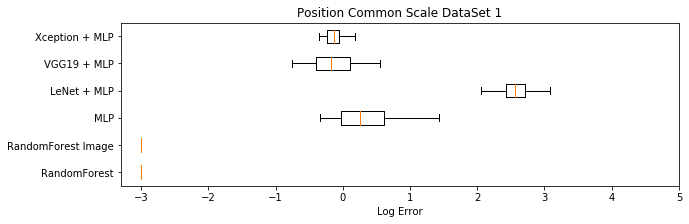

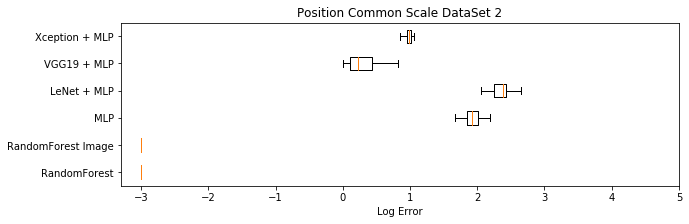

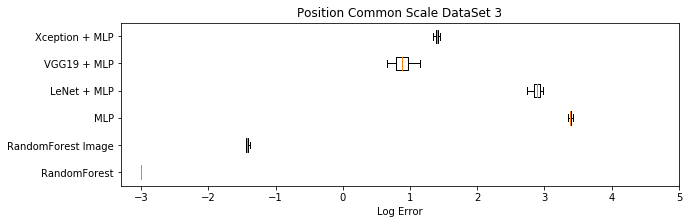

In [20]:

for i,r in enumerate(results_per_dataset):
    
    plt.figure(figsize=(10,3))
    plt.title('Position Common Scale DataSet ' + str(i+1))
    plt.xlabel('Classifier')
    plt.xlabel('Log Error')
#     plt.xlim(-.0001, 0.008)
    plt.xlim(-3.3,5)

    boxplot = plt.boxplot(r[1], vert=False, notch=False, labels=r[0], showfliers=False)


In [265]:
stats

{'loss': [0.037209509028150248,
  0.010786619601204799,
  0.0071519870041874961,
  0.0056615317152550141,
  0.0048437966278545453,
  0.0042917839598962948,
  0.0039205175293895063,
  0.0036134998570537765,
  0.0033800610199591625,
  0.0032297775256535095],
 'mean_absolute_error': [0.14000069143559876,
  0.079414141742084096,
  0.064629407617943738,
  0.057457684039950385,
  0.053115875014921876,
  0.050000309218408229,
  0.04790290487413406,
  0.045916881574611101,
  0.04440445675353371,
  0.043381514958457899],
 'mean_squared_error': [0.037209509028150248,
  0.010786619601204799,
  0.0071519870041874961,
  0.0056615317152550141,
  0.0048437966278545453,
  0.0042917839598962948,
  0.0039205175293895063,
  0.0036134998570537765,
  0.0033800610199591625,
  0.0032297775256535095],
 'time': 280.0439190864563,
 'val_loss': [0.0083646614680916252,
  0.0039568293782251025,
  0.0025850099765671133,
  0.0019957182852233836,
  0.0016624647745722889,
  0.0014883596463747379,
  0.00133649118389825

In [122]:
datasets = sorted(os.listdir(RESULTS_DIR))

epoch_results_per_dataset = [None]*len(datasets)

for d in datasets:

    classifiers = ['RF', 'RF_Image', 'MLP', 'LeNet', 'VGG19', 'Xception']

    mse = {}
    val_mse = {}
    
    for c in classifiers:
        
        if c.startswith('RF'):
            continue

        files = glob.glob(RESULTS_DIR + '/'+d+'/'+c+'/*_results.p')
        print 'Found', len(files), 'files for', c, 'on dataset', d

        mse_per_epochs = [0] * len(files)
        val_mse_per_epochs = [0] * len(files)

        for file in files:

            index = int(file.split('_results')[0].split('_')[-1])
    #         print 'Loading file', index

            with open(file, 'r') as f:
                stats = pickle.load(f)

            mse_per_epoch = stats['mean_squared_error']
            val_mse_per_epoch = stats['val_mean_squared_error']

            mse_per_epochs[index] = mse_per_epoch
            val_mse_per_epochs[index] = val_mse_per_epoch

        mse[c] = np.mean(mse_per_epochs, axis=0)
        val_mse[c] = np.mean(val_mse_per_epochs, axis=0)

    # order by classifier complexity

    epoch_results_per_dataset[int(d)-1] = (mse, val_mse)
    

Found 40 files for MLP on dataset 1
Found 40 files for LeNet on dataset 1
Found 40 files for VGG19 on dataset 1
Found 40 files for Xception on dataset 1
Found 40 files for MLP on dataset 2
Found 40 files for LeNet on dataset 2
Found 40 files for VGG19 on dataset 2
Found 40 files for Xception on dataset 2
Found 40 files for MLP on dataset 3
Found 40 files for LeNet on dataset 3
Found 40 files for VGG19 on dataset 3
Found 40 files for Xception on dataset 3


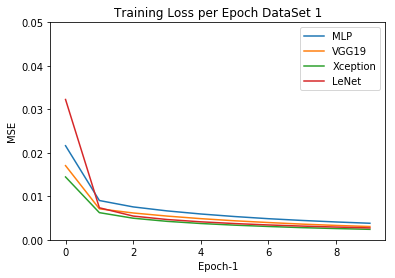

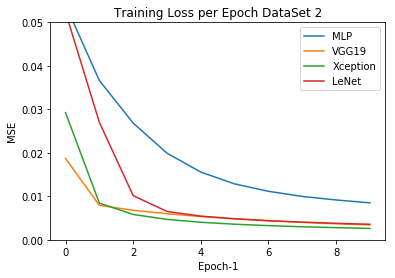

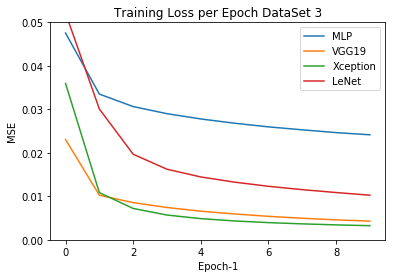

In [127]:
for d in datasets: 

    all_mse = epoch_results_per_dataset[int(d)-1][0]
    plt.figure()
    for e in all_mse:

        plt.title('Training Loss per Epoch DataSet ' + d)
        plt.ylabel('MSE')
        plt.xlabel('Epoch-1')
        plt.ylim(0,0.05)
        plot(all_mse[e], label=e)
        plt.legend()


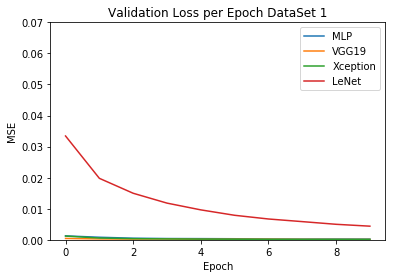

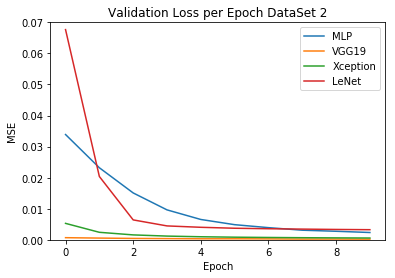

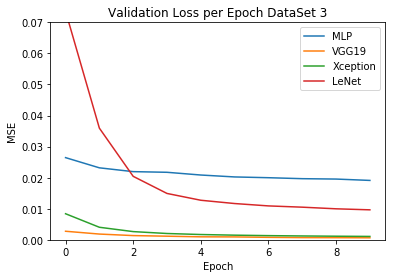

In [128]:
for d in datasets: 

    all_mse = epoch_results_per_dataset[int(d)-1][1]
    plt.figure()
    for e in all_mse:

        plt.title('Validation Loss per Epoch DataSet ' + d)
        plt.ylabel('MSE')
        plt.xlabel('Epoch')
        plt.ylim(0, 0.07)
        plot(all_mse[e], label=e)
        plt.legend()

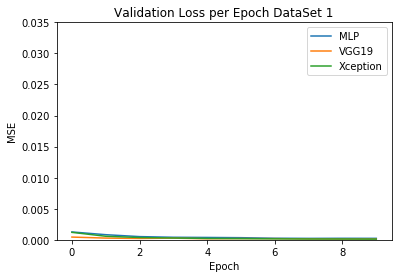

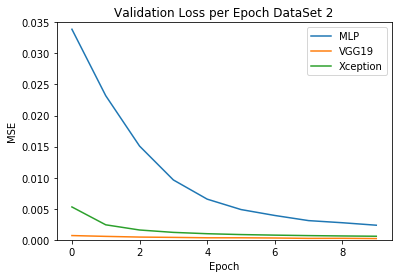

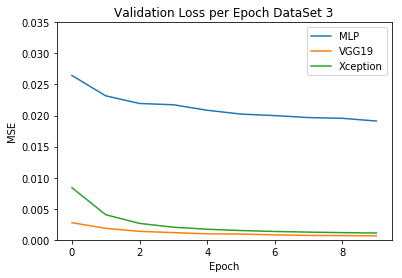

In [129]:
#
# WITHOUT LENET
#
for d in datasets: 

    all_mse = epoch_results_per_dataset[int(d)-1][1]
    plt.figure()
    for e in all_mse:

        if e == 'LeNet':
            continue
        
        plt.title('Validation Loss per Epoch DataSet ' + d)
        plt.ylabel('MSE')
        plt.xlabel('Epoch')
        plt.ylim(0,0.035)
        plot(all_mse[e], label=e)
        plt.legend()

In [130]:
from keras.models import load_model

Using TensorFlow backend.


In [141]:
#
#
#
sys.path.append('../EXP/')
import ClevelandMcGill as C
reload(C)

fig = C.Figure1_Position_Common_Scale()
fig.create(verbose=True)

input_img = fig.to_image()

bool


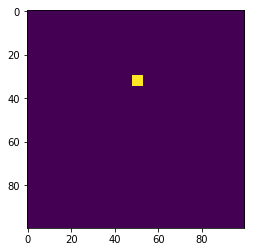

In [149]:
imshow(input_img)
print input_img.dtype

In [198]:
files = glob.glob(RESULTS_DIR + '/3/LeNet/*.hdf5')
model = load_model(files[0])

In [199]:
model

In [200]:
input_img = model.input

layer_dict = dict([(layer.name, layer) for layer in model.layers])


In [201]:
layer_dict

{u'activation_1': <keras.layers.core.Activation at 0x2b85853ddd90>,
 u'activation_2': <keras.layers.core.Activation at 0x2b858543ee10>,
 u'conv2d_1': <keras.layers.convolutional.Conv2D at 0x2b85853e6050>,
 u'conv2d_2': <keras.layers.convolutional.Conv2D at 0x2b8585409d50>,
 u'dense_1': <keras.layers.core.Dense at 0x2b85854aca50>,
 u'dense_2': <keras.layers.core.Dense at 0x2b85854f3d90>,
 u'dropout_1': <keras.layers.core.Dropout at 0x2b8585434a90>,
 u'dropout_2': <keras.layers.core.Dropout at 0x2b8585496790>,
 u'dropout_3': <keras.layers.core.Dropout at 0x2b85854f3450>,
 u'flatten_1': <keras.layers.core.Flatten at 0x2b8585496750>,
 u'max_pooling2d_1': <keras.layers.pooling.MaxPooling2D at 0x2b8585099050>,
 u'max_pooling2d_2': <keras.layers.pooling.MaxPooling2D at 0x2b858543ec90>}

In [206]:
from keras import backend as K
import numpy as np

In [225]:
    layer_name = 'conv2d_2'
    filter_index = i  # can be any integer from 0 to 511, as there are 512 filters in that layer

    # build a loss function that maximizes the activation
    # of the nth filter of the layer considered
    

50

In [262]:



layer_name = 'conv2d_1'
no_filters = int(layer_dict[layer_name].output.shape[-1])

img_width = 100
img_height = 100

out_image = np.zeros((img_height*5,img_width*10), dtype=np.uint8)

r = 0
c = 0

for i in range(no_filters):

    filter_index = i

    # build a loss function that maximizes the activation
    # of the nth filter of the layer considered
    layer_output = layer_dict[layer_name].output
    
#     loss = K.mean(layer_output[:, :, :, filter_index])
    loss = K.mean(layer_output[:, :, :, filter_index])
    # compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, input_img)[0]

    # normalization trick: we normalize the gradient
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

    # this function returns the loss and grads given the input picture
    iterate = K.function([input_img], [loss, grads])

    step = 1.
    # we start from a gray image with some noise
    input_img_data = np.random.random((1, img_width, img_height, 1)) * 20 + 128.
    # run gradient ascent for 20 steps
    for i in range(20):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step

    # util function to convert a tensor into a valid image
    def deprocess_image(x):
        # normalize tensor: center on 0., ensure std is 0.1
        x -= x.mean()
        x /= (x.std() + 1e-5)
        x *= 0.1

        # clip to [0, 1]
        x += 0.5
        x = np.clip(x, 0, 1)

        # convert to RGB array
        x *= 255
    #     x = x.transpose((1, 2, 0))
        x = np.clip(x, 0, 255).astype('uint8')
        return x

    img = input_img_data[0]
    img = deprocess_image(img)
    
    out_image[r*img_width:r*img_width+img_width, c*img_height:c*img_height+img_height] = img[:,:,0]
    
    c += 1
    if c >= 10:
        c = 0
        r += 1

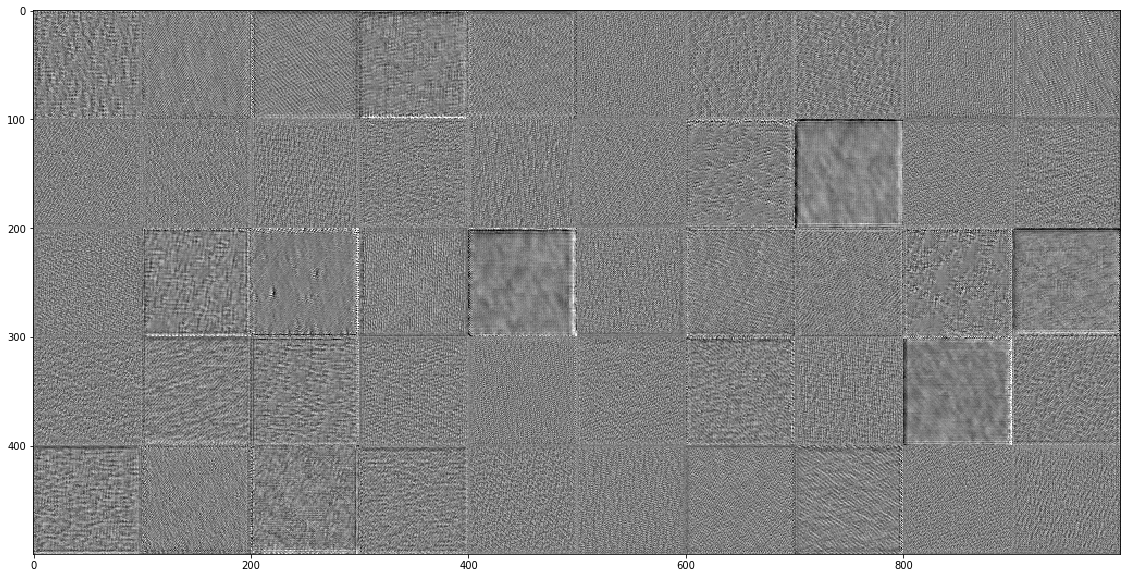

In [244]:
plt.figure(figsize=(20,10))
plt.imshow(out_image,cmap='gray')

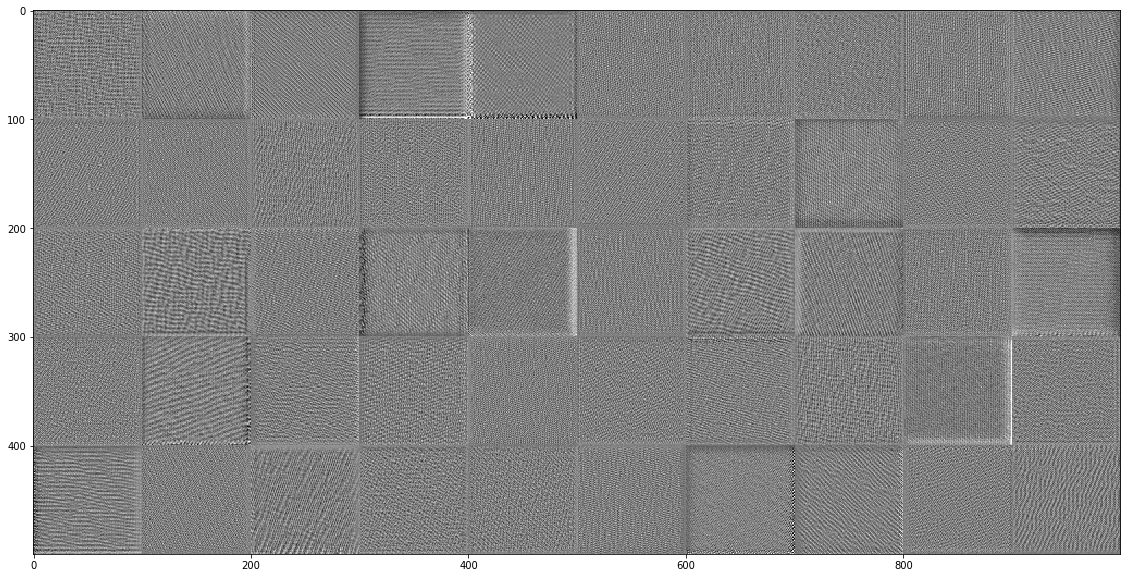

In [261]:
plt.figure(figsize=(20,10))
plt.imshow(out_image,cmap='gray')

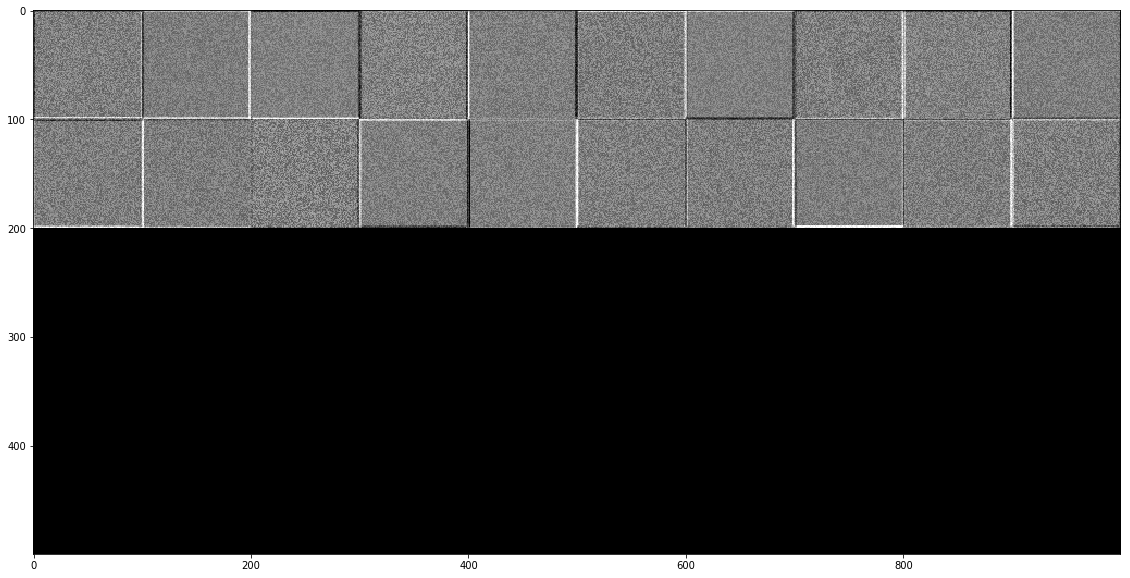

In [264]:
plt.figure(figsize=(20,10))
plt.imshow(out_image,cmap='gray')